In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA FILES/placement (1).csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# to remove unnecessary column
df = pd.read_csv('DATA FILES/placement (1).csv', index_col=0)

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [7]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [8]:
# how many unique value
# what are those unique values
df['cgpa'].nunique()

39

In [9]:
df['cgpa'].unique()

array([6.8, 5.9, 5.3, 7.4, 5.8, 7.1, 5.7, 5. , 6.1, 5.1, 6. , 6.9, 5.4,
       6.4, 5.2, 3.3, 4. , 6.6, 4.9, 4.7, 7. , 7.6, 3.9, 4.8, 8.1, 6.5,
       4.6, 7.5, 3.5, 8.3, 7.8, 8. , 7.3, 6.3, 8.5, 6.7, 4.4, 4.3, 6.2])

In [10]:
df['cgpa'].value_counts()

cgpa
4.9    6
5.2    5
6.1    5
7.0    5
6.0    5
6.8    4
7.3    4
6.5    4
5.7    4
4.8    4
5.4    4
6.3    3
7.5    3
4.7    3
5.0    3
6.9    3
5.1    3
6.4    2
5.3    2
5.8    2
6.7    2
7.1    2
8.1    2
4.4    2
7.6    2
6.6    2
4.0    2
8.0    1
4.3    1
8.5    1
7.4    1
4.6    1
7.8    1
8.3    1
3.5    1
3.3    1
3.9    1
5.9    1
6.2    1
Name: count, dtype: int64

In [11]:
len(df['cgpa'].value_counts())

39

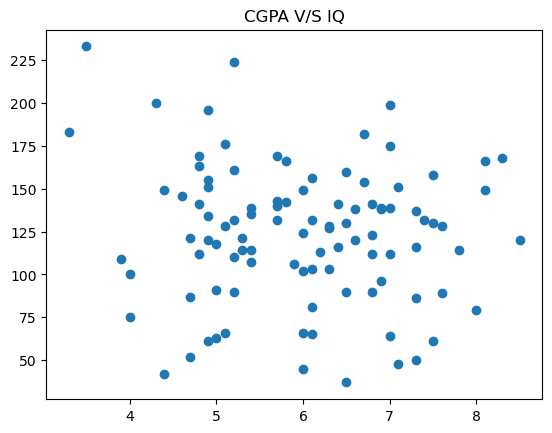

In [12]:
plt.title('CGPA V/S IQ')
plt.scatter(df['cgpa'],df['iq'])
plt.show()

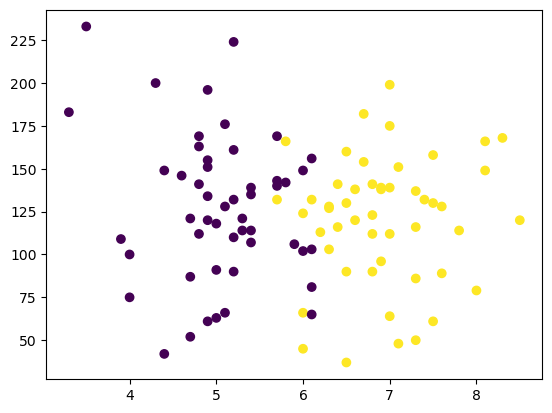

In [13]:
# by default c is used in classsification model c= classifier
# color se placed or unplaced ko separate kardiya hai yello is for placed (1) and purple for unplaceed (0)
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
X= df.drop(columns=['placement'])
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
Y=df['placement']
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Train Test Split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [18]:
X_train

,cgpa,iq
55,7.8,114.0
88,4.4,149.0
26,7.0,199.0
42,7.6,89.0
69,8.5,120.0
...,...,...
60,6.9,139.0
71,6.1,132.0
14,6.1,103.0
92,5.2,110.0


In [19]:
Y_train

55    1
88    0
26    1
42    1
69    1
     ..
60    1
71    1
14    0
92    0
51    0
Name: placement, Length: 80, dtype: int64

In [20]:
df['cgpa'].max()

8.5

In [21]:
df['iq'].max()

233.0

In [22]:
# bari values dominate na karein esliye standard scaling use karte hain
# to bring all input features on same scale
# jese cgpa ki values choti hain or iq ki values numerically bari hain
# like amount of salt in food to taste balance
# ML ka model kisi column is bari values ko zyada imp samajh leta hai or biased hojata hai by default

In [23]:
# standard scaler: used when jab apko apni data ki initial or maximum range na pata ho 
# min max scaler: used when you know min max range of data like ilets ka max score max 8 hota hai

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler

StandardScaler()

In [26]:
# scaler x train or x test dono pe apply hota hai
# fit transform use jab apke model ne data ko dekha he na ho like x train
# only transform used when apke model ne data ko dekha ho woh trained ho like x test pe only transform use hoga jabke x train pe fit transform use hoga

In [27]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.64027754, -0.29911792],
       [-1.44090679,  0.59472432],
       [ 0.91529299,  1.87164179],
       [ 1.4590314 , -0.93757666],
       [ 2.27463902, -0.14588782],
       [-0.80654531,  1.28425975],
       [-0.98779145,  0.21164907],
       [-1.44090679, -2.13787909],
       [-0.80654531, -1.5249587 ],
       [ 1.1871622 , -0.24804122],
       [ 0.82466992,  0.31380247],
       [-0.71592224,  0.90118451],
       [-0.17218383,  1.02887626],
       [-0.71592224, -0.91203831],
       [ 0.73404686, -0.35019462],
       [ 1.00591606, -1.98464899],
       [ 0.82466992, -0.75880821],
       [ 1.91214675,  1.02887626],
       [ 0.73404686, -0.91203831],
       [-0.71592224,  2.51010053],
       [-0.5346761 ,  0.23718742],
       [-1.07841452,  0.95226121],
       [-0.89716838, -1.60157375],
       [-1.53152986,  1.89718014],
       [ 0.00906231, -0.04373442],
       [-0.71592224,  0.16057237],
       [-0.5346761 , -0.47788637],
       [-0.89716838, -0.88649996],
       [ 0.00906231,

In [28]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.36840833,  0.10949567],
       [ 2.09339288,  1.07995296],
       [ 0.28093151,  0.03288063],
       [ 0.00906231, -1.5249587 ],
       [ 1.36840833, -1.65265045],
       [-1.25966065,  0.51810927],
       [-0.98779145, -0.14588782],
       [-0.98779145,  1.79502675],
       [ 0.00906231, -2.06126404],
       [ 0.73404686, -0.06927277],
       [-1.80339906, -0.65665481],
       [ 1.4590314 ,  0.05841897],
       [-0.98779145, -1.65265045],
       [ 0.00906231,  0.59472432],
       [ 1.1871622 , -1.01419171],
       [-0.17218383,  0.41595587],
       [-0.98779145,  0.74795441],
       [ 1.1871622 , -1.93357229],
       [-0.5346761 ,  0.33934082],
       [-1.89402213, -0.42680967]])

In [29]:
# logistic model is another name for classification model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [30]:
# model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(X_test)

In [32]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [33]:
pd.DataFrame({'Y_test':Y_test, 'y_pred':y_pred})

,Y_test,y_pred
83,1,1
53,1,1
70,1,1
45,1,0
44,1,1
39,0,0
22,0,0
80,0,0
10,1,0
0,1,1


In [77]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [79]:
accuracy_score(Y_test,y_pred)
# hamari kitni classes ko model ne sahi pick kiya hai / thek preeict kiya hai

0.85

In [81]:
# Precision ( True Positive + True Negative Rate) = mere model ne sahi ko kitni bar sahi kaha .
precision_score(Y_test,y_pred)

0.8888888888888888

In [83]:
f1_score(Y_test,y_pred)

0.8421052631578947

In [87]:
confusion_matrix(Y_test,y_pred)

array([[9, 1],
       [2, 8]], dtype=int64)

In [91]:
print('Classification_report:',classification_report(Y_test,y_pred))

Classification_report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



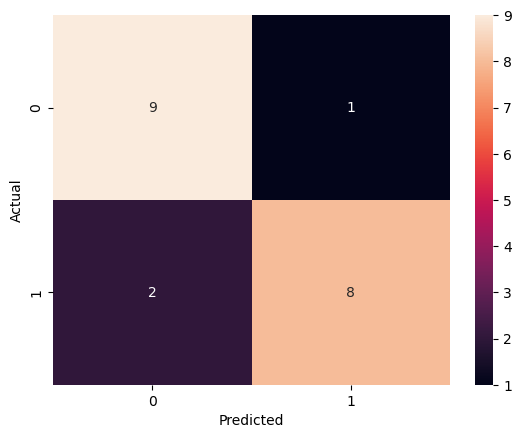

In [95]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: >

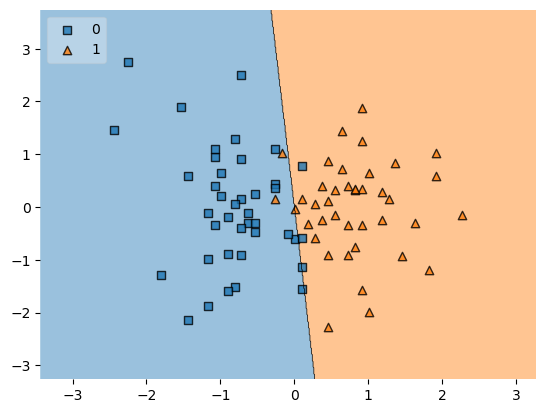

In [36]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

<Axes: >

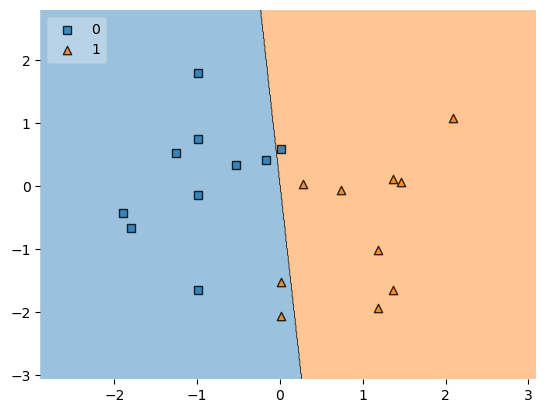

In [97]:
plot_decision_regions(X_test, Y_test.values, clf=clf, legend=2)